In [1]:
import xarray as xr

In [2]:
wap500        = xr.open_dataset('/g/data/k10/cb4968/data/sample_data/wap/cmip6/IITM-ESM_wap_monthly_historical_regridded.nc')['wap'].sel(plev = 500e2)
wap500

ERROR 1: PROJ: proj_create_from_database: Open of /g/data/hh5/public/apps/miniconda3/envs/analysis3-23.04/share/proj failed


<xarray.DataArray 'wap' (time: 360, lat: 22, lon: 128)>
[1013760 values with dtype=float32]
Coordinates:
  * time     (time) object 1970-01-16 12:00:00 ... 1999-12-16 12:00:00
    plev     float64 5e+04
  * lat      (lat) float64 -29.3 -26.51 -23.72 -20.93 ... 20.93 23.72 26.51 29.3
  * lon      (lon) float64 0.0 2.812 5.625 8.438 ... 348.8 351.6 354.4 357.2
Attributes:
    units:    hPa day$^-1$

In [3]:
wap_day = wap500.isel(time=0)
wap_day

<xarray.DataArray 'wap' (lat: 22, lon: 128)>
[2816 values with dtype=float32]
Coordinates:
    time     object 1970-01-16 12:00:00
    plev     float64 5e+04
  * lat      (lat) float64 -29.3 -26.51 -23.72 -20.93 ... 20.93 23.72 26.51 29.3
  * lon      (lon) float64 0.0 2.812 5.625 8.438 ... 348.8 351.6 354.4 357.2
Attributes:
    units:    hPa day$^-1$

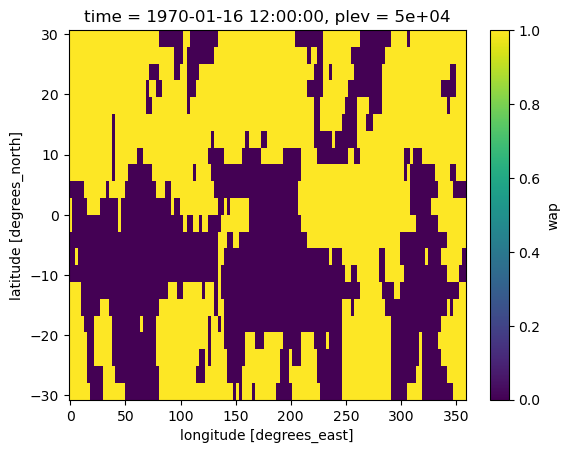

In [4]:
(wap_day>0).plot()

In [10]:
da = (wap_day>0)

In [11]:
mask = xr.where(da>0, 1, 0)
area = (mask.sum(dim=('lat','lon')) / (len(da['lat']) * len(da['lon']))) * 100

In [12]:
print(area.data)

58.13210227272727


In [ ]:
def calc_F_pr10(da):
    ''' Frequency of gridboxes exceeding 10 mm/day on monthly [% of domain]'''
    da = mF.resample_timeMean(da, 'M')
    mask = xr.where(da>10,1,0)
    F_pr10 = (mask.sum(dim=('lat','lon')) / (len(da['lat']) * len(da['lon']))) * 100
    return F_pr10

In [ ]:
    # dim = mC.dims_class(da)
    # da = xr.where(da>0, 1, 0)
    # area = np.sum(da * np.transpose(dim.aream3d, (2, 0, 1)), axis=(1,2)) / np.sum(dim.aream)